# Basic Network Analysis with NetworkX

In the next few lectures, we'll consider data analysis and modeling with *network data.* There are many topics at the intersection of networks and computation (indeed, this is my research area). We'll spend one day on network basics, one day on common data science tasks, and one day on the rather relevant topic of epidemics on networks. 

In this first lecture, we'll introduce the NetworkX package for working with network data, and see how to perform some simple manipulations, visualizations, and analyses. 

For many more examples of working with NetworkX, see the gallery [here](https://networkx.org/documentation/stable/auto_examples/index.html). 

### A Note on Performance

NetworkX is an extremely accessible and popular package for working with network data. However, it's not the most *performant* package, and for complex operations on large graphs, other tools should often be prefered. A common recommendation is the [igraph](https://igraph.org/python/doc/tutorial/tutorial.html) package. For problems that are primarily mathematical in nature, working with matrix representations of graphs may be a better choice. 

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Graphs

A *graph* consists of a collection of objects (often *nodes* or *vertices*) along with a collection of connections between them (often called *edges* or *arcs*). Let's load in a famous example, which comes from the following classic paper: 

> Zachary W. (1977). An information flow model for conflict and fission in small groups. *Journal of Anthropological Research*, 33, 452-473

While normally we would need to read in some data (perhaps from CSV files) and create a graph ourselves, NetworkX actually comes bundled with this one already. 

In [2]:
G = nx.karate_club_graph()
G

We observe that the object we have just created is an object of class `Graph`, which has been imported through Networkx. We'll inspect its properties in a moment, but before we do, let's take a look at it. 

The `nx.draw()` function uses Matplotlib behind the scenes to draw the graph. It's generally not the highest quality choice, but it is convenient. More sophisticated network visualizations can be constructed through other tools, many of which are interoperable with Networkx. One high quality choice is the [Bokeh package](http://holoviews.org/user_guide/Network_Graphs.html) for complex interactive graphics, while [Plotly](https://plotly.com/python/network-graphs/) also offers a good solution. For our purposes today, though, the built-in `nx.draw()` is fine. 

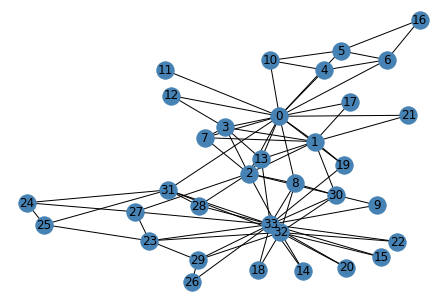

In [3]:
layout = nx.layout.fruchterman_reingold_layout(G)
nx.draw(G, layout, with_labels=True, node_color = "steelblue")

This graph is often called the "Karate Club Graph." Each node (blue dot) represents an individual member of a karate club. Edges between them are measurements of social ties by the researcher Zachary; informally, you can think of two connected nodes as being friends. 

We can easily extract iterators for nodes and edges: 

In [4]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [5]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

An entry like `(8, 33)` in the list of edges indicates that there's an edge between the node labeled `8` and the node labeled `33`. 

When working with graphs, a fundamental task is to, given a node, obtain a list of its neighbors. NetworkX makes this easy: we essentially just treat the graph as a dictionary: 

In [6]:
G[4] # neighbors of node 4

AtlasView({0: {}, 6: {}, 10: {}})

In [7]:
list(G[4])

[0, 6, 10]

### Metadata

Usually, we have more to work with than just the "raw" graph. Both nodes and edges can have stored data. This data can be accessed and used in several different ways. For small graphs, one can get an overview this way: 

In [8]:
G.nodes(data = True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

Each node is now accompanied by a little dictionary of its attributes. It looks like all the nodes have an attribute called `club`, which has values `"Mr. Hi"` and `"Officer"`. We can access a dictionary of these attributes directly like this: 

In [9]:
clubs = nx.get_node_attributes(G, "club")
clubs

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

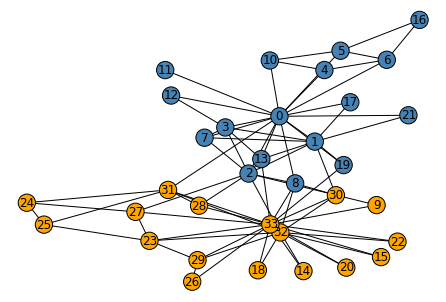

In [10]:
nx.draw(G, layout,
        with_labels=True, 
        node_color = ["orange" if clubs[i] == "Officer" else "steelblue" for i in G.nodes()],
        edgecolors = "black" # confusingly, this is the color of node borders, not of edges
        )

The reason that this data set is so famous is that it provides a relatively pure case study of the process of *graph fission.* In this case, the karate club studied eventually broke into two separate clubs after a conflict between the instructor ("Mr. Hi") and the club president ("Officer"). Node 0 is Mr. Hi himself, and Node 33 is the club president. As you can see, the two new clubs closely align with social relationships. This makes sense -- if you were going to go join a new club, you'd probably join the one where most of your friends were going.  

Indeed, this data set is often used as a benchmark for clustering algorithms which aim to split graphs into multiple, meaningful pieces. 

## Node Degrees

One of the simplest and most important operations in network analysis is to determine the *degree* of a node. This is simply the number of edges attached to that node. In a social network like the one above, you might think of the degree as the popularity (number of friends) of the node. 

NetworkX makes it easy to compute the degree of a node. 

In [13]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [14]:
i = 0
print(f"The degree of node {i} is {G.degree(i)}".)

The degree of node 0 is 16


## The Friendship Paradox

Did you know that your friends are more popular than you? 

Well, that may or may not be true -- but it is true *on average*. Here's what the so-called "Friendship Paradox" states: 

1. First, ask Zenith how many friends she has, and write that down. 
2. Then, ask each of Zenith's friends how many friends *they* have. Take the average, and write the second number down. 
3. Repeat this process for every person in a social network. 
4. The average of the first column (the number of friends of the first person) will always be less than the average of the second column (the average number of friends of each of the first person's friends). 

In network language, statistically speaking, 

> The average degree of a node is less than the average degree of one of its neighbors. 

Let's use NetworkX tools to check this: 

In [48]:
def friendship_paradox(G):

    n = len(G.nodes())

    num_friends = np.zeros(n)
    neighbor_num_friends = np.zeros(n)

    for i in G.nodes():
        num_friends[i] = G.degree(i)

        # list of neighbors
        neighbors = G[i]

        # degrees of neighbors
        degs = [G.degree(j) for j in neighbors]

        neighbor_num_friends[i] = np.mean(degs)
    
    mean_num_friends = np.round(np.mean(num_friends), 2)
    mean_neighbor_num_friends = np.round(np.mean(neighbor_num_friends), 2)
    
    print(f"Average number of friends of nodes in G: {mean_num_friends}")
    print(f"Average number of friends of friends of nodes in G: {mean_neighbor_num_friends}")

In [49]:
friendship_paradox(G)

Average number of friends of nodes in G: 43.69
Average number of friends of friends of nodes in G: 105.55


In the Karate Club graph, an average node has 4.5 friends, but an average friend of that node has 9.6 friends! 

This kind of pattern is fairly typical. For example, we can see it in action on a much larger social network. Let's consider a noticeably larger network mined from Facebook back from when that was still a thing you could do. The data is from the following paper: 

> J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NeurIPS, 2012.

It's freely available [here](https://snap.stanford.edu/data/egonets-Facebook.html).


In [40]:
url = "https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/datasets/facebook_combined.txt"
facebook = pd.read_csv(url, 
                       delimiter = " ",
                       names = ["source", "target"])

In [41]:
G = nx.from_pandas_edgelist(facebook)

This graph is much larger than the Karate Club graph from before. 

In [44]:
len(G.nodes()), len(G.edges())

(4039, 88234)

In [50]:
friendship_paradox(G)

Average number of friends of nodes in G: 43.69
Average number of friends of friends of nodes in G: 105.55


## Degree Distributions

Networks in which nodes all have the same degree are called *regular networks,* and are, for the most part, mathematical fairytales. In real-world networks, nodes can often have very different degrees. A good way to visualize node degrees is by considering the degree distribution. This can be calculated easily using `nx.degree_histogram()`. 

In [61]:
hist = nx.degree_histogram(G)
hist[0:5]

[0, 75, 98, 93, 99]

The element `hist[i]` gives the number of nodes of degree `i`. So, the above says that there are zero nodes of degree 0, 75 nodes of degree 1, 98 nodes of degree 2, and so on. 

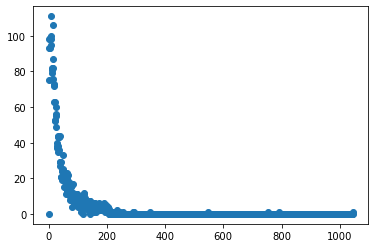

In [62]:
plt.scatter(np.arange(len(hist)), hist)

This plot is pretty hard to read. Maybe if we transformed the axes?

[]

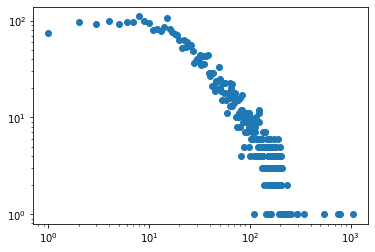

In [88]:
no_zeros = 1.0*np.array(hist)
no_zeros[no_zeros == 0] = np.nan

plt.scatter(np.arange(len(no_zeros)), no_zeros)
# plt.semilogx()
# plt.semilogy()
plt.loglog()

There is a surprising amount of controversy in the network science community about the appropriate axes on which to plot degree distributions, and about how to analyze these distributions. Special controversy considers the question of whether degree distributions tend to follow *power laws*, which on log-log axes correspond to straight lines. For example, it's common to see plots that look like the following: 

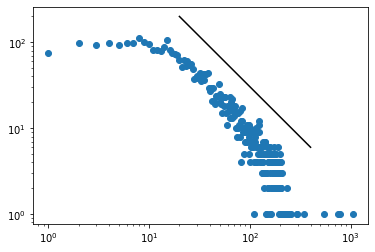

In [96]:
plt.scatter(np.arange(len(no_zeros)), no_zeros)
# plt.semilogx()
# plt.semilogy()
plt.loglog()

plt.plot([20, 400], [200, 6], color = "black")

Hmmm, does that part of the distribution appear to be a straight line? 

For a scholarly perspective on this problem and its importance, see this [recent perspective article](https://www.nature.com/articles/s41467-019-09038-8) by Petter Holme. 